In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from osgeo import ogr
from osgeo import gdal
import glob as glob
import os
import ntpath
%matplotlib inline

In [6]:
files = glob.glob('./GPM_3B42/*.clp.tiff')

In [7]:
files = files[730:-367] # clip the date range to 2000.01.01 to 2014.12.31

In [8]:
files[-1]

'./GPM_3B42/3B42_daily.2013.12.31.7.SUB.r.clp.tiff'

In [9]:
# open one raster to initialize

fl = files[0]

ds = gdal.Open(fl)
P = np.array(ds.GetRasterBand(1).ReadAsArray())
P = P.astype(np.float16)

# clear the fill values
P[P < 0] = np.NaN

ct = 1

In [10]:
for fl in files[1:]:
    ds = gdal.Open(fl)
    tmp = np.array(ds.GetRasterBand(1).ReadAsArray())
    tmp = tmp.astype(np.float16)

    # clear the fill values
    P[P < 0] = np.NaN
    
    P += tmp
    
    ct += 1

In [11]:
P /= ct # compute daily average
P *= 365.25 # compute annual average

In [12]:
np.savez_compressed('./annual_GPM3B42_wUS.npz',P)

/Users/barnhatb/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5907: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 333 x 392)
  '(shape is %d x %d)' % inp.shape[::-1])


AttributeError: max must be larger than min in range parameter.

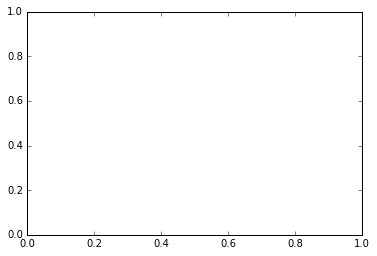

In [10]:
P2 = P[np.isnan(P)==0]
plt.hist(P,100);

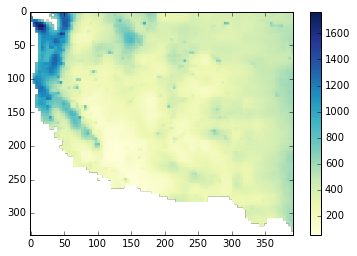

In [13]:
plt.imshow(P, cmap = 'YlGnBu', vmin=np.nanmin(P),vmax=np.nanmax(P))
plt.colorbar()

In [ ]:
np.nanmin(ET)

In [ ]:
np.nanmax(ET)